In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,1
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,0
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,0
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


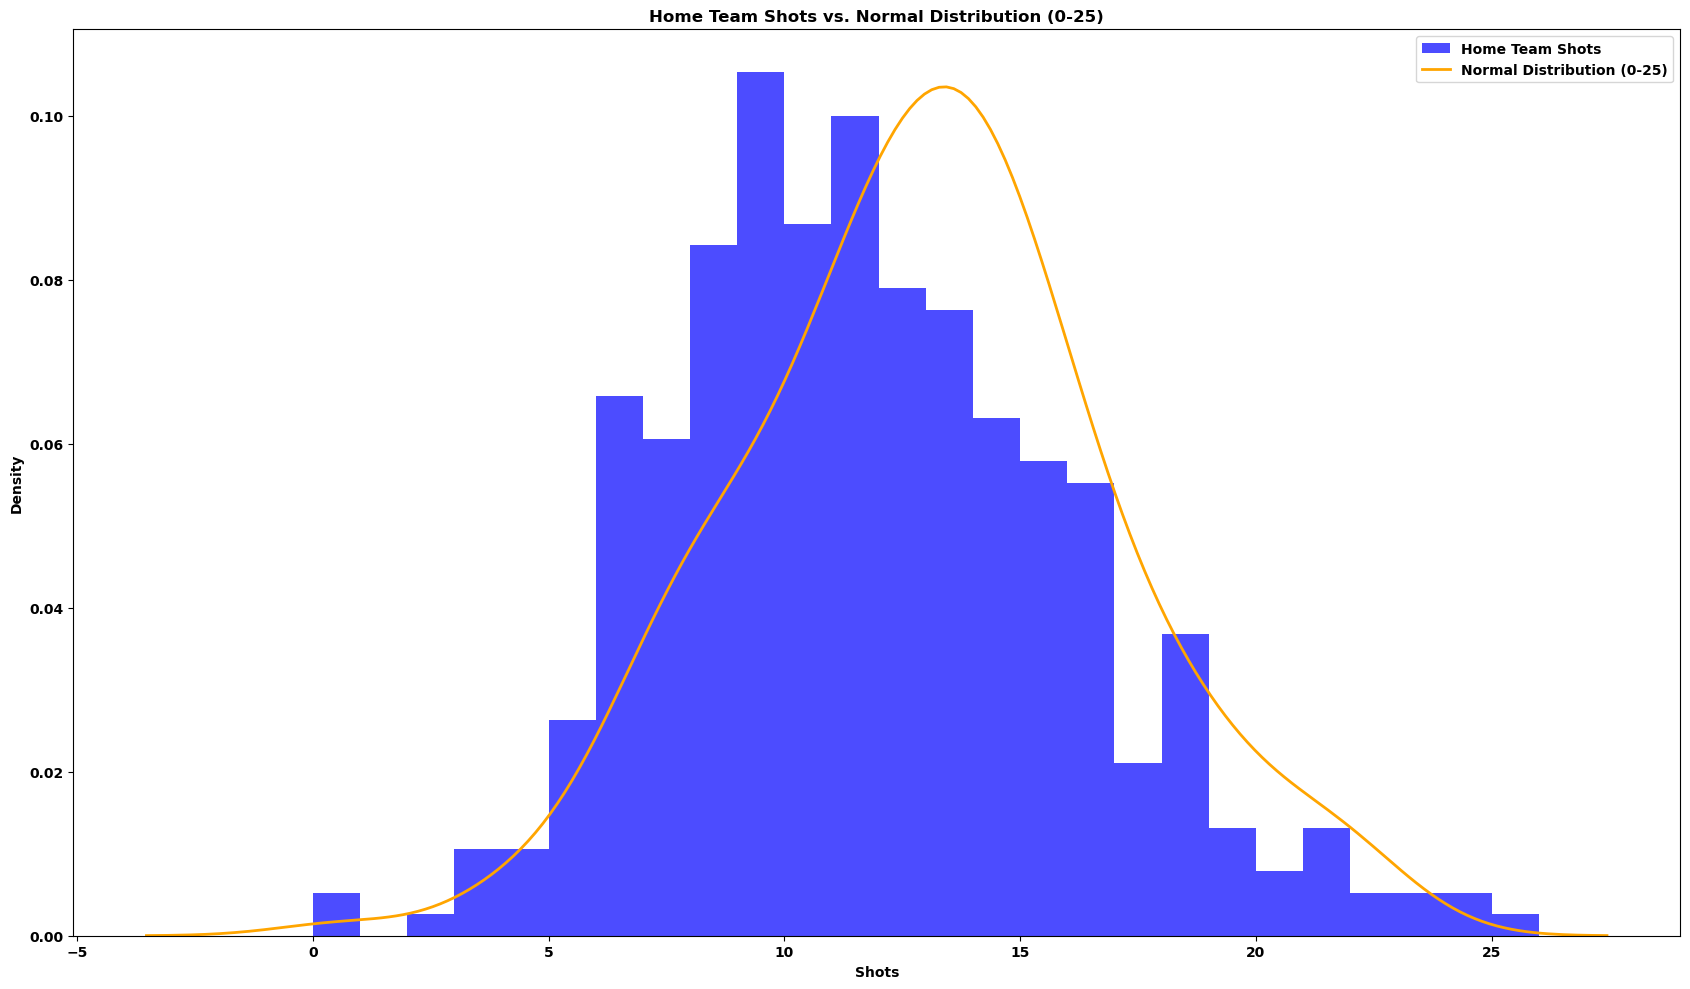

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']

# Definir parâmetros da distribuição normal
mean = 12.5
std_dev = 4
num_samples = 190

# Gerar dados normais
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Filtrar para manter dados dentro do intervalo [0, 25]
data = data[(data >= 0) & (data <= 25)]

# Criação dos plots
fig, ax1 = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots com densidade normalizada
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, label='Home Team Shots', density=True)

# Plot da linha de densidade dos dados normais
sns.kdeplot(data, ax=ax1, color='orange', label='Normal Distribution (0-25)', linewidth=2)

# Configuração do título e dos rótulos dos eixos
ax1.set_title('Home Team Shots vs. Normal Distribution (0-25)')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Density')

# Exibir a legenda
ax1.legend()

# Ajuste do layout
plt.tight_layout()
plt.show()


In [14]:
stats.shapiro(general_shots)

ShapiroResult(statistic=0.9815573692321777, pvalue=8.915819489629939e-05)

In [5]:
stats.anderson(general_shots)

AndersonResult(statistic=2.2472988020949742, critical_values=array([0.57 , 0.649, 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.33157894736842, scale=4.278010613480794)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [6]:
stats.monte_carlo_test(general_shots)

TypeError: monte_carlo_test() missing 2 required positional arguments: 'rvs' and 'statistic'